In [9]:
import cv2
from PIL import Image
import numpy as np
from IPython.display import display

In [4]:
def show_image(image):
    display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

In [24]:
img = cv2.imread('a.png')

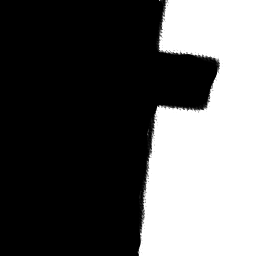

In [25]:
show_image(img)

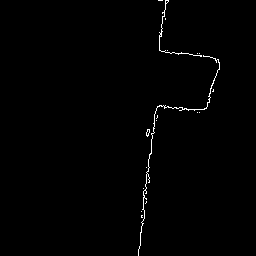

In [26]:
canny = cv2.Canny(img, 100, 200,apertureSize = 3)
show_image(canny)

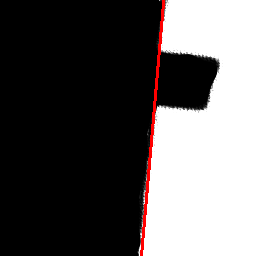

In [29]:
line_img = img.copy()
lines = cv2.HoughLines(canny, 1, np.pi/180, 50)
axis_list = []
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * -b)
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * -b)
    y2 = int(y0 - 1000 * a)
    
    slope = (y2 - y1) / (x2 - x1)
    axis_list.append((x1, y1, x2, y2, slope))

max_axis = max(axis_list, key=lambda x: abs(x[4]))
cv2.line(line_img, (max_axis[0], max_axis[1]), (max_axis[2], max_axis[3]), (0, 0, 255), 2)

show_image(line_img)